# Modeling Sentiment Trends in Social Media Data

#### About Dataset ~ Twitter Sentiment Analysis Dataset 

### Introduction: Analyzing Public Sentiment on Twitter

In the age of digital communication, Twitter serves as a real-time reflection of public opinion. With users actively discussing brands, products, events, and trends, the platform provides a rich source of unstructured textual data. Analyzing sentiment on Twitter helps uncover how people feel about various topics, offering valuable insights for businesses, researchers, and policymakers.

This project explores a large-scale **Twitter Sentiment Analysis Dataset** consisting of over **74,000 tweets**, each labeled with a sentiment category — **Positive**, **Negative**, **Neutral**, or **Irrelevant** — and associated with a specific topic. The goal is to **analyze and visualize sentiment trends across topics** to understand engagement patterns and public attitudes.

Key components of the analysis include:
- Identifying **top trending topics** based on tweet frequency.
- Measuring **sentiment distribution** across the dataset.
- Investigating **topic-specific sentiment patterns**, especially for major tech brands like *Google* and *Microsoft*.
- Understanding **message length characteristics**, revealing how users communicate within Twitter’s character limits.
- Utilizing data visualizations such as **bar charts**, **box plots**, **pie charts**, **heatmaps**, and **word clouds** for effective interpretation.

By processing and visualizing this data, the analysis aims to provide a data-driven overview of how various topics are perceived on Twitter — highlighting dominant sentiments, patterns of discussion, and content behavior.


In [2]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Text processing
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Feature extraction
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Model building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Word cloud visualization
from wordcloud import WordCloud

# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sarvesh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sarvesh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Sarvesh\AppData\Roaming\nltk_data...


True

#### Importing & reading the dataset 

In [3]:
cols=['ID', 'Topic', 'Sentiment', 'Text']
train = pd.read_csv("twitter_training.csv",names=cols)

In [4]:
train.head()

,ID,Topic,Sentiment,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


#### Information about the dataframe

In [5]:
train.shape

(74682, 4)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         74682 non-null  int64 
 1   Topic      74682 non-null  object
 2   Sentiment  74682 non-null  object
 3   Text       73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [7]:
train.describe(include=object)

,Topic,Sentiment,Text
count,74682,74682,73996
unique,32,4,69491
top,TomClancysRainbowSix,Negative,"At the same time, despite the fact that there ..."
freq,2400,22542,172


In [8]:
train['Sentiment'].unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

#### Check for null or missing values in the dataset

In [9]:
train.isnull().sum()

ID             0
Topic          0
Sentiment      0
Text         686
dtype: int64

In [10]:
train.dropna(inplace=True)

In [11]:
train.isnull().sum()

ID           0
Topic        0
Sentiment    0
Text         0
dtype: int64

#### Check for duplicate values

In [12]:
train.duplicated().sum()

2340

In [13]:
train.drop_duplicates(inplace=True)

In [14]:
train.duplicated().sum()

0

#### Visualization of count of different topics

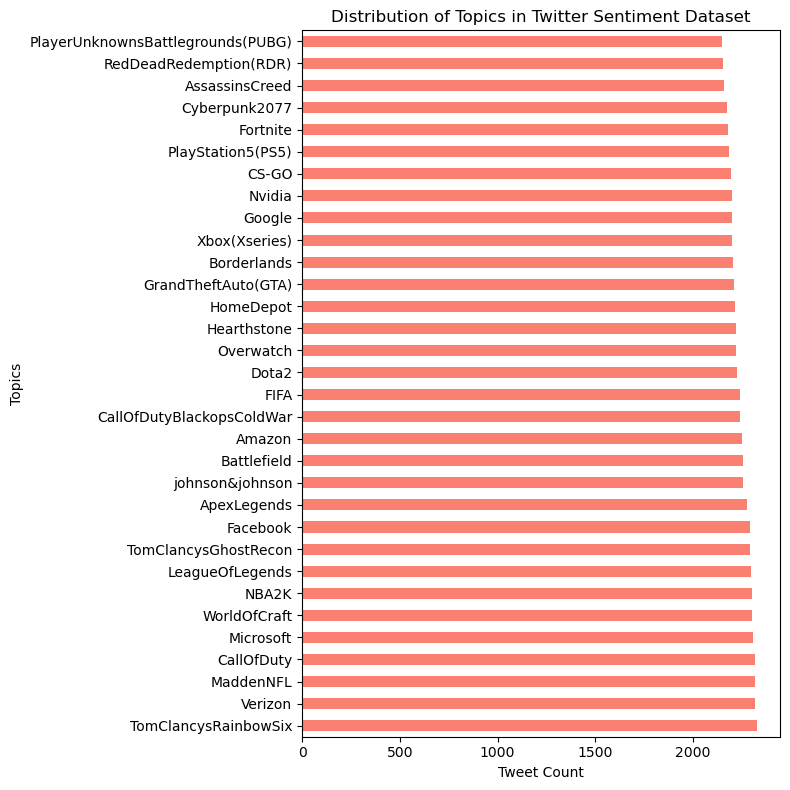

In [20]:
plt.figure(figsize=(8, 8))
train['Topic'].value_counts().plot(kind='barh', color='salmon')
plt.xlabel("Tweet Count")
plt.ylabel("Topics")
plt.title("Distribution of Topics in Twitter Sentiment Dataset")
plt.tight_layout()
plt.show()

#### Sentiment Distribution

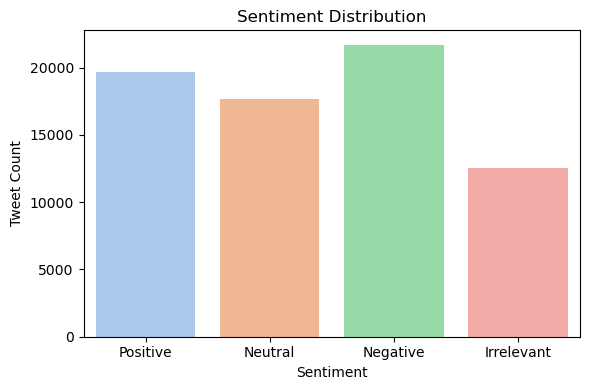

In [22]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Sentiment', data=train, hue='Sentiment', palette='pastel', legend=False)
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Tweet Count")
plt.tight_layout()
plt.show()

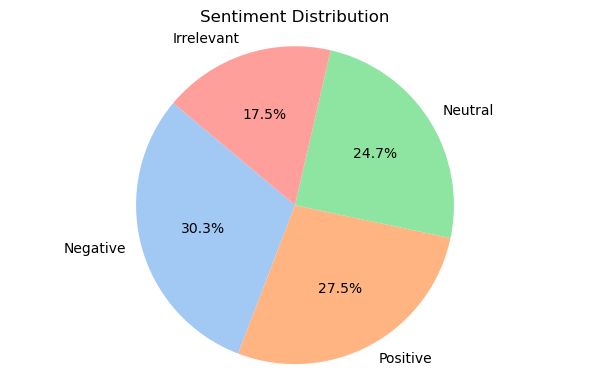

In [26]:
# Get pastel colors from Seaborn
pastel_colors = sns.color_palette('pastel')[:4]  # Get 4 pastel colors

# Calculate sentiment counts
sentiment_counts = train['Sentiment'].value_counts()

# Create pie chart
plt.figure(figsize=(6, 4))
plt.pie(
    sentiment_counts, 
    labels=sentiment_counts.index, 
    autopct="%1.1f%%", 
    startangle=140,
    colors=pastel_colors
)

plt.title('Sentiment Distribution')
plt.axis('equal')  # Keeps the pie circular
plt.tight_layout()
plt.show()

``` Observation: Most topic have negative sentiment ```

In [28]:
train.head()

,ID,Topic,Sentiment,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


#### Sentiment Distribution Topic-wise

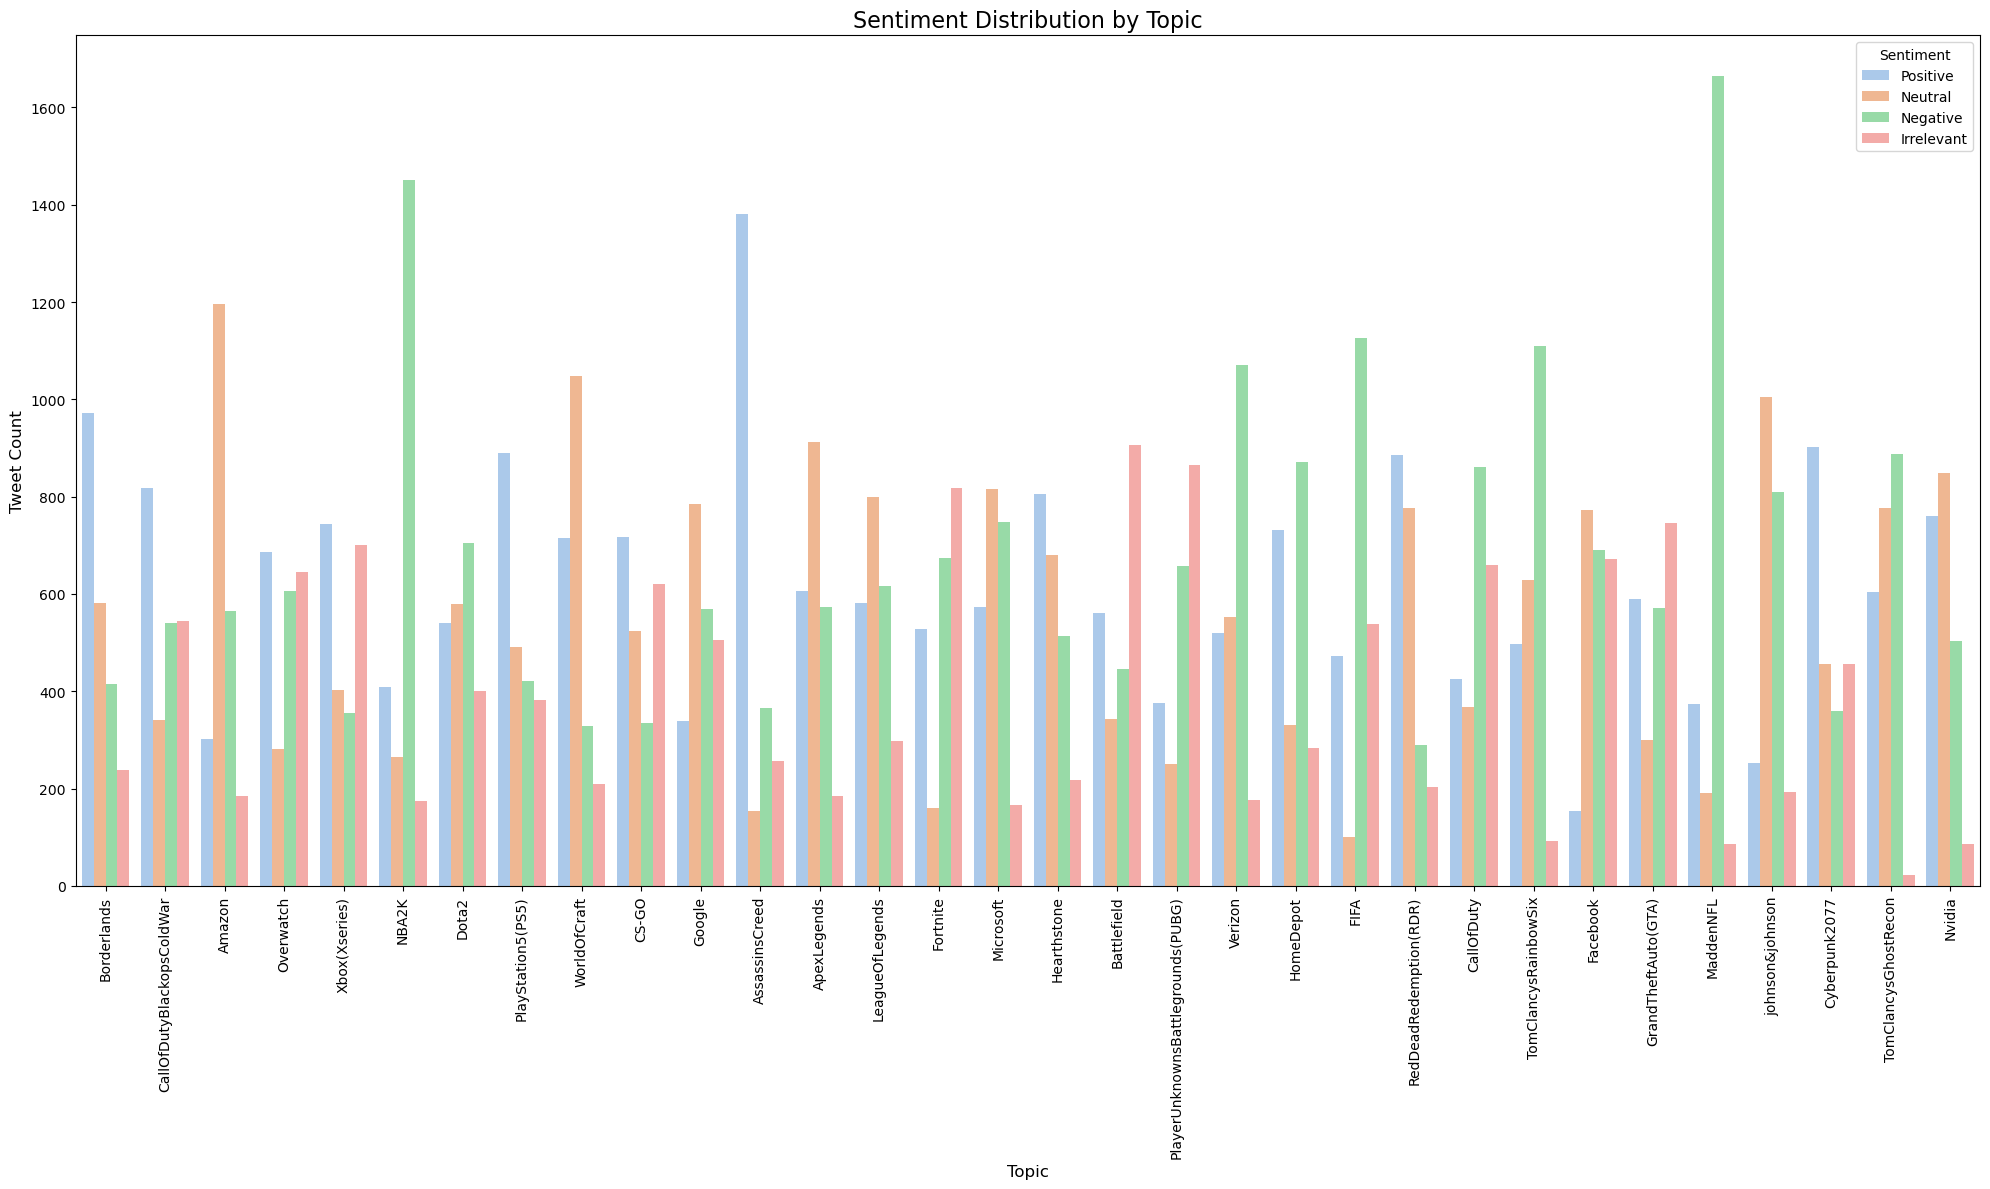

In [29]:
plt.figure(figsize=(20, 12))
sns.countplot(x='Topic', data=train, hue='Sentiment', palette='pastel')

plt.title("Sentiment Distribution by Topic", fontsize=16)
plt.xlabel("Topic", fontsize=12)
plt.ylabel("Tweet Count", fontsize=12)
plt.xticks(rotation=90)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

In [31]:
## Group by Topic and Sentiment
topic_wise_sentiment = train.groupby(["Topic", "Sentiment"]).size().reset_index(name='Count')

## Select Top 5 Topics
topic_counts = train['Topic'].value_counts().nlargest(5).index
top_topics_sentiment = topic_wise_sentiment[topic_wise_sentiment['Topic'].isin(topic_counts)]

#### Top 5 Topics with Negative Sentiments

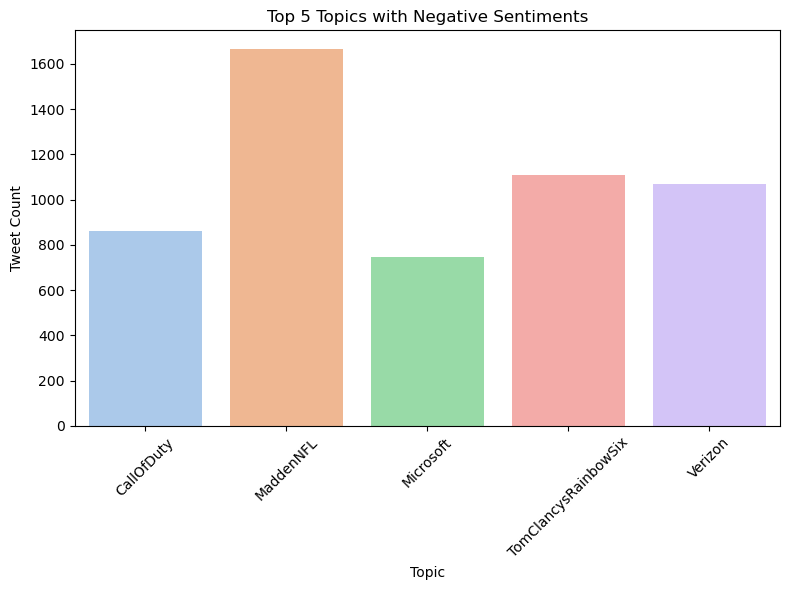

In [38]:
plt.figure(figsize=(8, 6))

# Set hue to match x, disable legend to avoid redundancy
sns.barplot(
    data=top_topics_sentiment[top_topics_sentiment['Sentiment'] == 'Negative'], 
    x='Topic', 
    y='Count', 
    hue='Topic',        
    palette='pastel',   
    dodge=False        
)
plt.legend([],[], frameon=False) 
plt.title('Top 5 Topics with Negative Sentiments')
plt.xlabel('Topic')
plt.ylabel('Tweet Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Top 5 Topics with Positive Sentiments

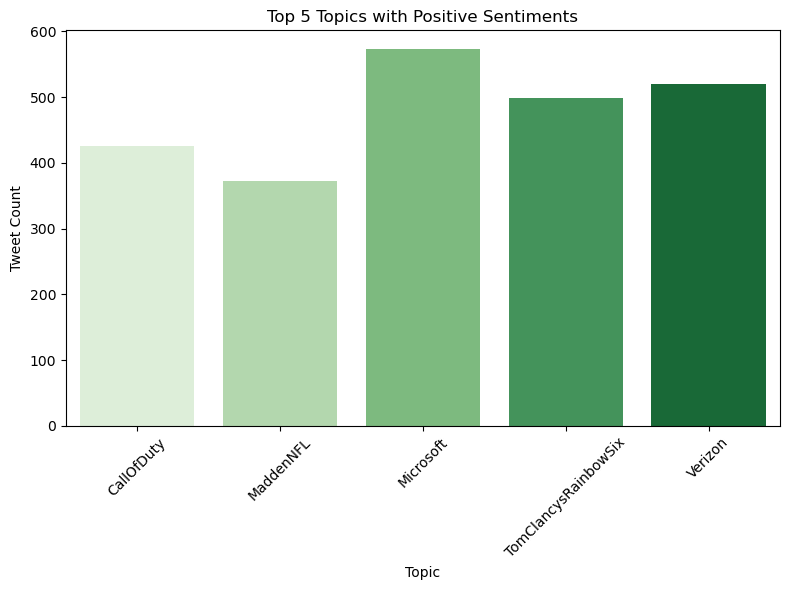

In [48]:
plt.figure(figsize=(8, 6))

sns.barplot(
    data=top_topics_sentiment[top_topics_sentiment['Sentiment'] == 'Positive'],
    x='Topic',
    y='Count',
    hue='Topic',           
    palette='Greens',
    dodge=False            
)

plt.legend([], [], frameon=False)  
plt.title('Top 5 Topics with Positive Sentiments')
plt.xlabel('Topic')
plt.ylabel('Tweet Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


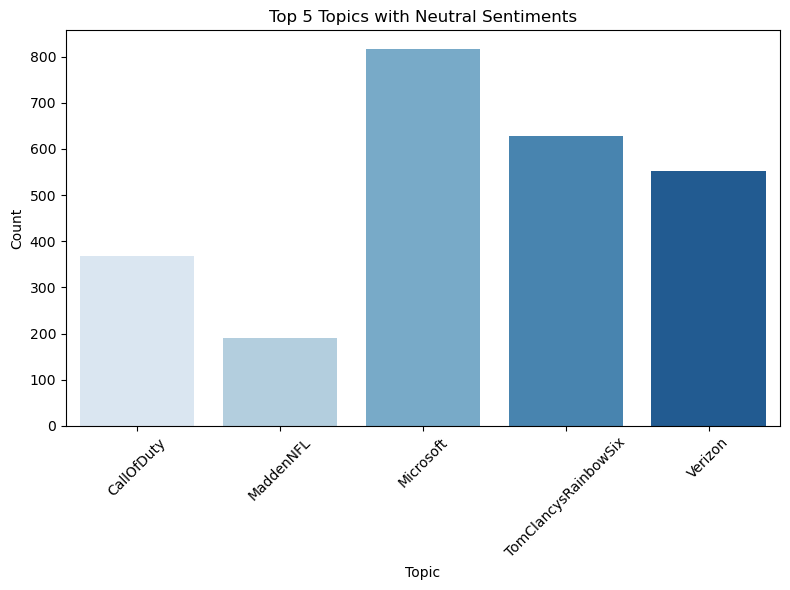

In [54]:
plt.figure(figsize=(8, 6))

sns.barplot(
    data=top_topics_sentiment[top_topics_sentiment['Sentiment'] == 'Neutral'],
    x='Topic',
    y='Count',
    hue='Topic',
    palette='Blues',
    dodge=False
)
plt.legend([], [], frameon=False)
plt.title('Top 5 Topics with Neutral Sentiments')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

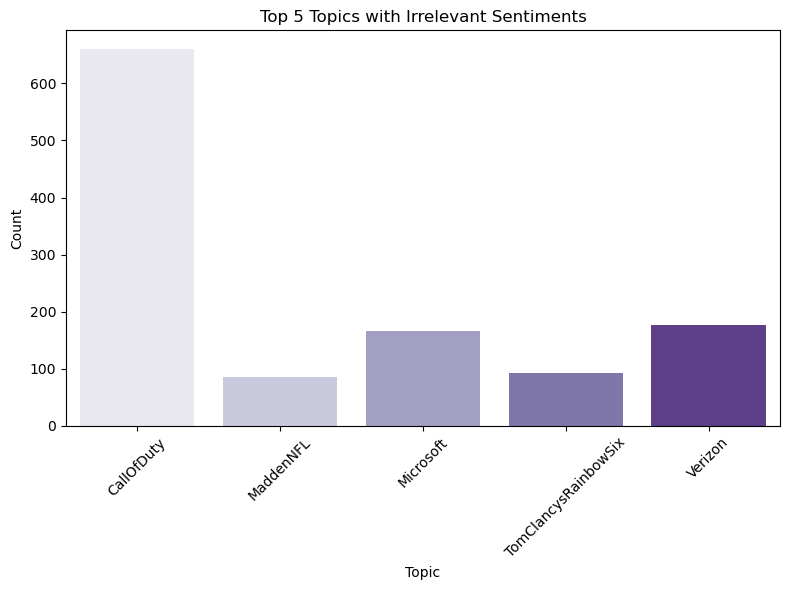

In [55]:
plt.figure(figsize=(8, 6))

sns.barplot(
    data=top_topics_sentiment[top_topics_sentiment['Sentiment'] == 'Irrelevant'],
    x='Topic',
    y='Count',
    hue='Topic',
    palette='Purples',
    dodge=False
)
plt.legend([], [], frameon=False)
plt.title('Top 5 Topics with Irrelevant Sentiments')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Google : Sentiment Distribution 

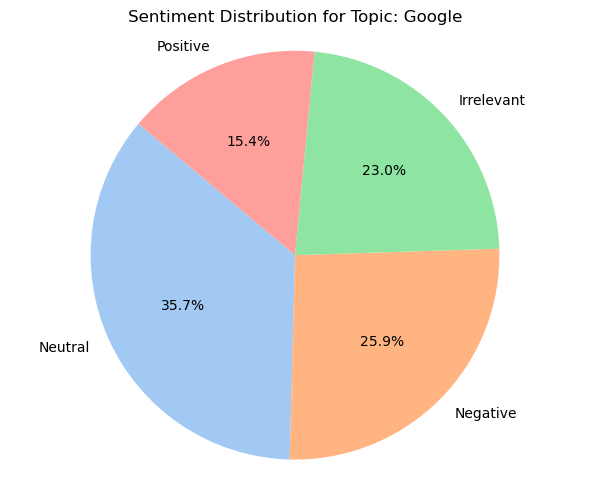

In [60]:
# Filter for the topic 'Google'
google_data = train[train['Topic'] == 'Google']

# Count sentiment distribution
sentiment_counts = google_data['Sentiment'].value_counts()

# Plot pie chart
plt.figure(figsize=(6, 5))
colors = sns.color_palette('pastel')[:len(sentiment_counts)]
plt.pie(
    sentiment_counts,
    labels=sentiment_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors
)
plt.title('Sentiment Distribution for Topic: Google')
plt.axis('equal')  
plt.tight_layout()
plt.show()

#### Microsoft : Sentiment Distribution 

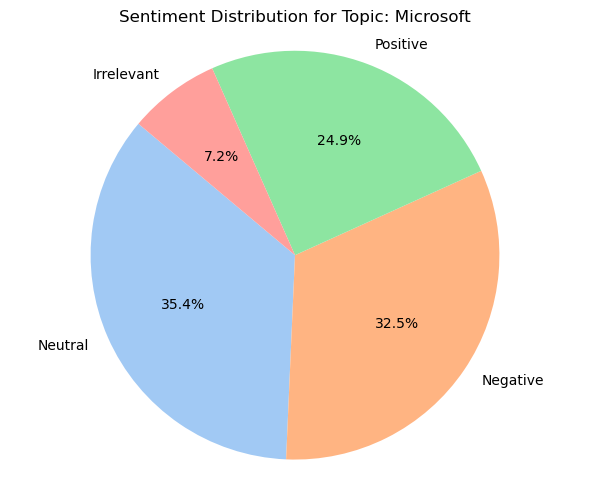

In [62]:
# Filter the dataset for the topic 'Microsoft'
ms_data = train[train['Topic'] == 'Microsoft']

# Count sentiment occurrences
sentiment_counts = ms_data['Sentiment'].value_counts()

# Plot pie chart
plt.figure(figsize=(6,5))
colors = sns.color_palette('pastel')[:len(sentiment_counts)] 

plt.pie(
    sentiment_counts,
    labels=sentiment_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors
)

plt.title('Sentiment Distribution for Topic: Microsoft')
plt.axis('equal')  
plt.tight_layout()
plt.show()

In [63]:
train['msg_len'] = train['Text'].apply(len)

In [67]:
train

,ID,Topic,Sentiment,Text,msg_len
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,53
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,51
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,50
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,51
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,57
...,...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...,128
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...,117
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...,125
74680,9200,Nvidia,Positive,Just realized between the windows partition of...,159


#### Plot of message length distribution for training data

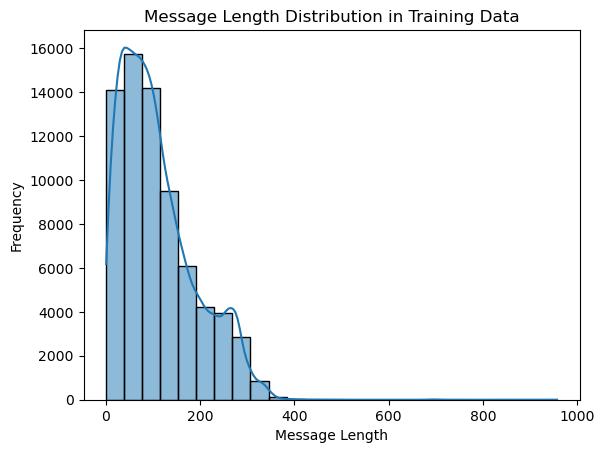

In [68]:
sns.histplot(train['msg_len'], bins=25,kde=True)
plt.title('Message Length Distribution in Training Data')
plt.ylabel('Frequency')
plt.xlabel('Message Length')
plt.show()

#### Plot message length distribution by sentiment for training data

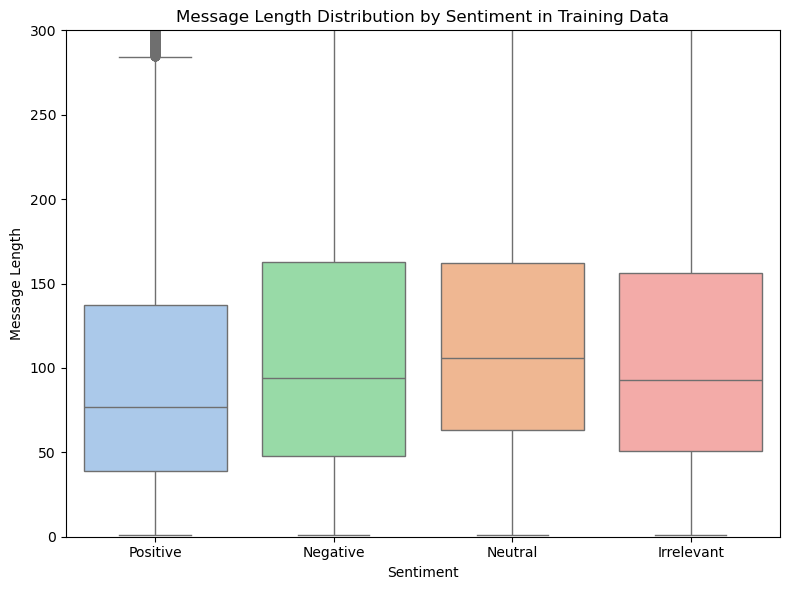

In [70]:
plt.figure(figsize=(8, 6))

sns.boxplot(
    data=train,
    x='Sentiment',
    y='msg_len',
    hue='Sentiment',                        
    palette='pastel',                        
    order=['Positive', 'Negative', 'Neutral', 'Irrelevant'],
    dodge=False                              
)

plt.legend([], [], frameon=False)            
plt.title('Message Length Distribution by Sentiment in Training Data')
plt.xlabel('Sentiment')
plt.ylabel('Message Length')
plt.ylim(0, 300)
plt.tight_layout()
plt.show()


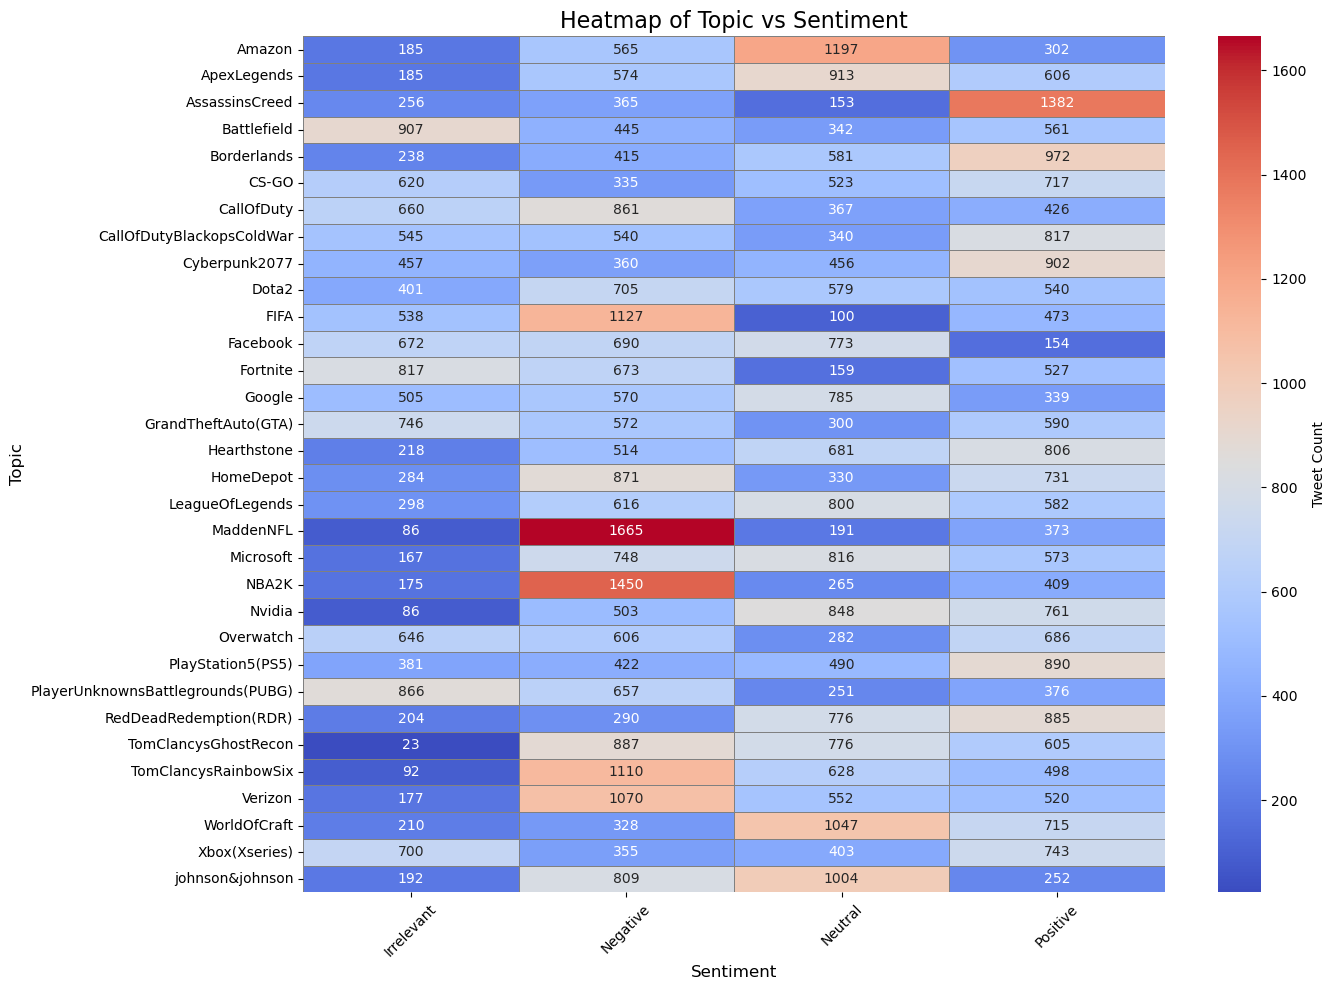

In [71]:
# Create the crosstab
crosstab = pd.crosstab(index=train['Topic'], columns=train['Sentiment'])

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(
    crosstab,
    cmap='coolwarm',
    annot=True,
    fmt='d',
    linewidths=0.5,
    linecolor='gray',
    cbar_kws={'label': 'Tweet Count'}
)

# Add labels and title
plt.title('Heatmap of Topic vs Sentiment', fontsize=16)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Topic', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

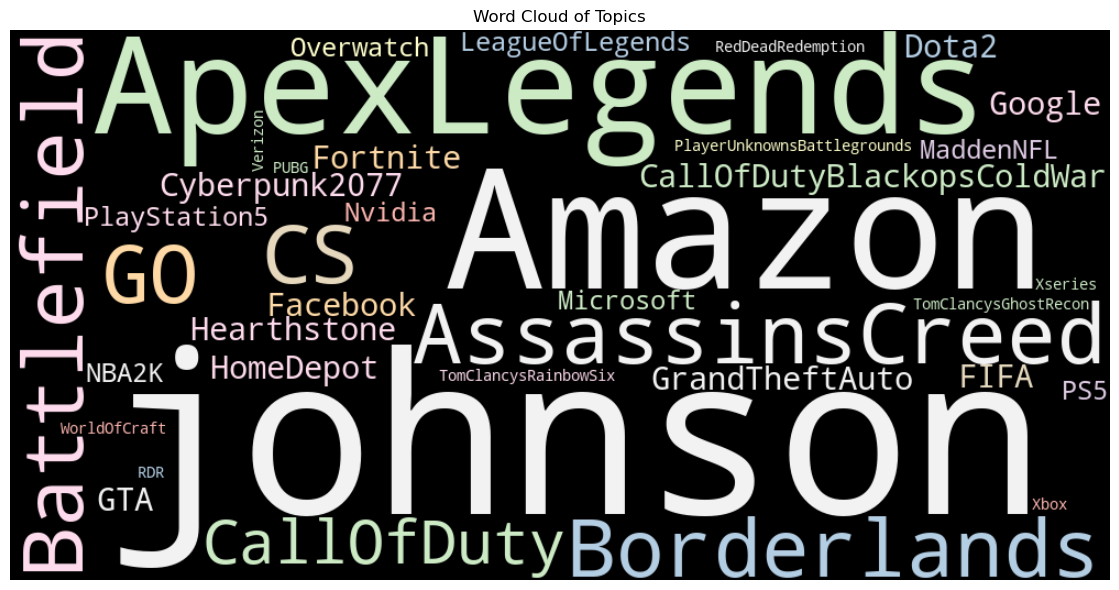

In [81]:
from wordcloud import WordCloud
# Join topic names into one string
topic_list = ' '.join(crosstab.index)
# Generate the WordCloud
wc = WordCloud(
    width=1000,
    height=500,
    background_color='black',
    colormap='Pastel1' 
).generate(topic_list)
# Plot the WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Topics')
plt.tight_layout()
plt.show()

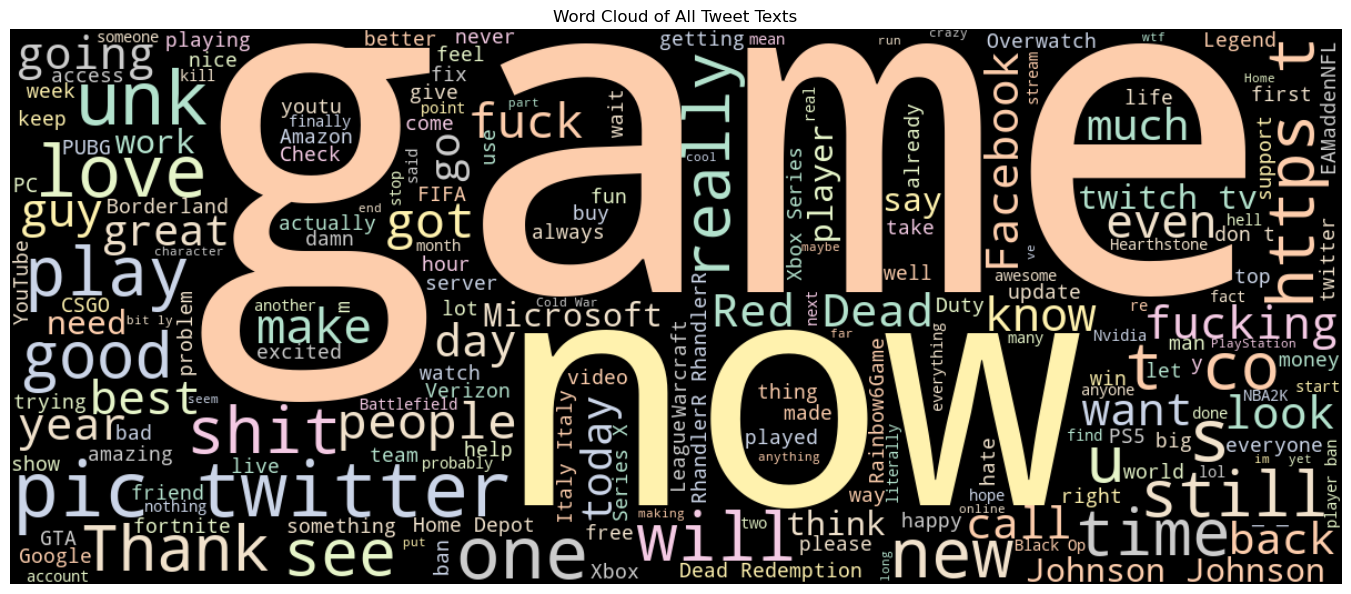

In [80]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Join all tweet texts into one string
corpus = ' '.join(train['Text'].dropna()) 

# Generate the WordCloud from the corpus
wc2 = WordCloud(
    width=1200,
    height=500,
    background_color='black',
    colormap='Pastel2',
    max_words=200,
    stopwords=None
).generate(corpus)  

# Plot the WordCloud
plt.figure(figsize=(14, 6))
plt.imshow(wc2, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of All Tweet Texts')
plt.tight_layout()
plt.show()


### Conclusion: Twitter Sentiment Analysis

The sentiment analysis of Twitter data revealed the following key insights:

#### Most Frequent Topic
- **TomClancyRainbowSix** emerged as the most frequently discussed topic, reflecting strong user engagement.

#### Sentiment Distribution
- **Negative**: 30.3%  
- **Positive**: 27.5%  
- **Neutral**: 24.7%  
- **Irrelevant**: 17.5%  
- The sentiment landscape shows a slight negative skew, though a fairly balanced range of opinions is evident.

#### Topic-Specific Sentiment
- Topics such as **Google** and **Microsoft** predominantly exhibited **neutral sentiment**, indicating that discourse around these brands is generally factual and objective.

#### Message Length
- The majority of tweets were under **400 characters**, consistent with Twitter’s concise communication format.

---

#### Key Takeaway
This analysis offers valuable insights into public sentiment on social media, enabling better understanding of audience perspectives across different topics. The findings can support sentiment-driven strategies in brand monitoring, communication, and engagement.

